In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from joblib.testing import xfail
from colorama import Fore, Back, Style
from plotly.subplots import make_subplots

In [9]:
resultsTable = pd.read_csv("trainingResults.csv")

In [10]:
resultsTable

,Model,Accuracy,F1 Score,Precision,Recall,ROC,ROC_AUC,cm
0,"VotingClassifier(estimators=[('lr',\n ...",0.9516310461192351,0.8071748878923767,0.75,0.8737864077669902,"(array([0. , 0. , 0. , 0....",0.983398799377455,[[0.96183206 0.03816794]\n [0.12621359 0.87378...
1,"VotingClassifier(estimators=[('lr',\n ...",0.9640044994375703,0.8461538461538461,0.8380952380952381,0.8543689320388349,"(array([0. , 0. , 0. , 0....",0.9846093035895156,[[0.9783715 0.0216285 ]\n [0.14563107 0.85436...
2,"VotingClassifier(estimators=[('lr',\n ...",0.9640044994375703,0.84,0.865979381443299,0.8155339805825242,"(array([0. , 0. , 0. , 0....",0.9847204723436844,[[0.98346056 0.01653944]\n [0.18446602 0.81553...
3,"VotingClassifier(estimators=[('lr',\n ...",0.9640044994375703,0.84,0.865979381443299,0.8155339805825242,"(array([0. , 0. , 0. , 0....",0.9847204723436844,[[0.98346056 0.01653944]\n [0.18446602 0.81553...
4,"(('LR', LogisticRegression(class_weight='balan...",0.9561304836895388,0.8186046511627907,0.7857142857142857,0.8543689320388349,"(array([0. , 0. , 0. , 0....",0.9847204723436844,[[0.96946565 0.03053435]\n [0.14563107 0.85436...
...,...,...,...,...,...,...,...,...
65365,BestVote (LR_balanced+LR_default+RF_200+Ada_100),0.9561304836895388,0.8078817733990148,0.82,0.7961165048543689,"(array([0. , 0. , 0. , 0....",0.9812124805454681,[[0.97709924 0.02290076]\n [0.2038835 0.79611...
65366,"(('LR_balanced', LogisticRegression(class_weig...",0.9606299212598425,0.8275862068965517,0.84,0.8155339805825242,"(array([0. , 0. , 0. , 0....",0.982892363941797,[[0.97964377 0.02035623]\n [0.18446602 0.81553...
65367,BestVote (LR_balanced+LR_default+KNN_5+KNN_7),0.9606299212598425,0.8275862068965517,0.84,0.8155339805825242,"(array([0. , 0. , 0. , 0....",0.982892363941797,[[0.97964377 0.02035623]\n [0.18446602 0.81553...
65368,"(('LR_balanced', LogisticRegression(class_weig...",0.9583802024746907,0.8140703517587939,0.84375,0.7864077669902912,"(array([0. , 0. , 0. , 0....",0.982200647249191,[[0.98091603 0.01908397]\n [0.21359223 0.78640...


In [19]:
# Define the columns you want to convert
cols_to_numeric = ['F1 Score', 'Accuracy', 'Precision', 'Recall']

# Apply pd.to_numeric to these columns
resultsTable[cols_to_numeric] = resultsTable[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

/tmp/ipykernel_10035/695897926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultsTable[cols_to_numeric] = resultsTable[cols_to_numeric].apply(pd.to_numeric, errors='coerce')


In [12]:
original_size = resultsTable.shape[0]
resultsTable = resultsTable.drop_duplicates(subset=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC_AUC'])
print(f"Dropped {original_size - resultsTable.shape[0]} duplicate rows")

Dropped 64980 duplicate rows


In [13]:
top_models = resultsTable.sort_values(by='F1 Score', ascending=False).head(5)

print("Top 5 models based on F1 score:")
for i, (_, row) in enumerate(top_models.iterrows(), 1):
    print(f"{i}. {row['Model']} with an F1 score of {row['F1 Score']:.4f}")

Top 5 models based on F1 score:
1. BestVote (LR_balanced+RF_200+KNN_7) with an F1 score of 0.8627
2. (('LR', LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='auto',
                   random_state=3003)), ('RF', RandomForestClassifier(n_estimators=200, random_state=3003)), ('KNN', KNeighborsClassifier(n_neighbors=7))) with an F1 score of 0.8627
3. (('LR_balanced', LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='auto',
                   random_state=3003)), ('RF_200', RandomForestClassifier(n_estimators=200, random_state=3003)), ('KNN_7', KNeighborsClassifier(n_neighbors=7))) with an F1 score of 0.8627
4. (('LR_balanced', LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='auto',
                   random_state=3003)), ('RF_100', RandomForestClassifier(random_state=3003)), ('KNN_7', KNeighborsClassifier(n_neighbors=7))) with an F1 score of 0.8585
5. BestVote (LR_balanced+RF_100+KNN_7) with an F1 score of 0.8585


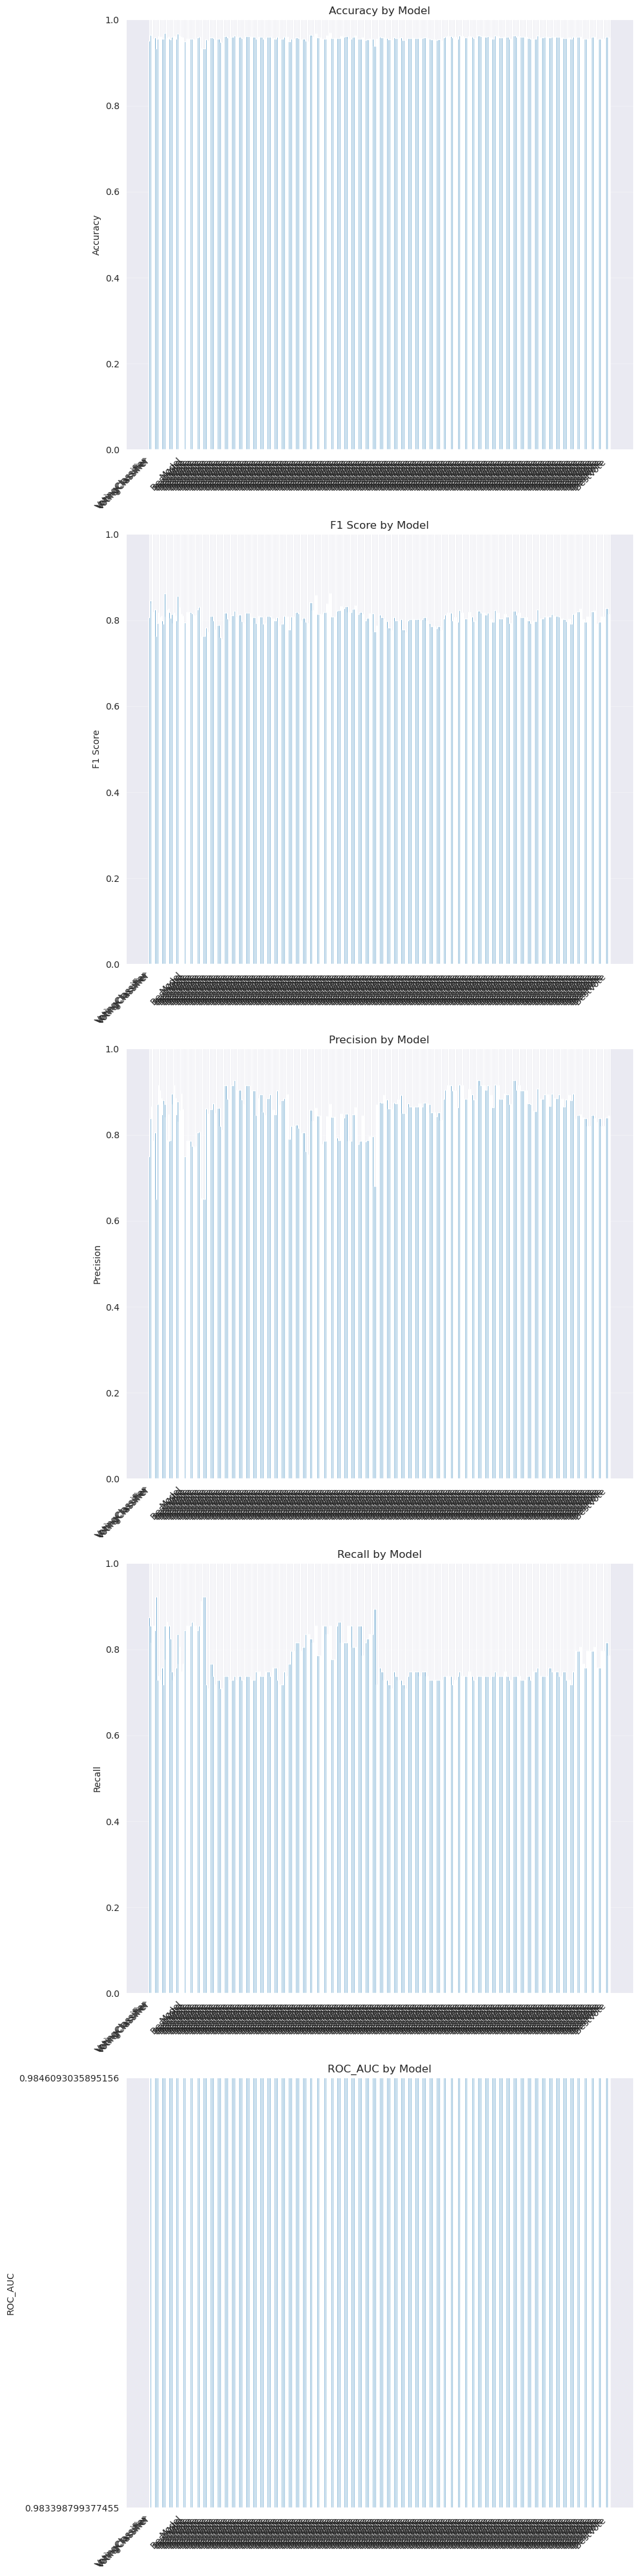

In [21]:
numeric_metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC_AUC']

model_labels = [str(model).split('(')[0] for model in resultsTable['Model']]

fig, axes = plt.subplots(len(numeric_metrics), 1, figsize=(10, len(numeric_metrics) * 8))

for i, col in enumerate(numeric_metrics):
    bars = axes[i].bar(range(len(resultsTable)), resultsTable[col])
    axes[i].set_xticks(range(len(resultsTable)))
    axes[i].set_xticklabels(model_labels, rotation=45, ha='right')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'{col} by Model')
    axes[i].set_ylim(top=1)
    axes[i].grid(axis='y', alpha=0.3)

    for j, bar in enumerate(bars):
        height = bar.get_height()

plt.tight_layout()
plt.show()

In [35]:
resultsTable.to_csv("data/trainingResults.csv", index=False, mode="w")